In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
import spacy
import os
import matplotlib.pyplot as plt

In [3]:
# !py -m spacy download ru_core_news_sm

In [4]:
nlp = spacy.load('ru_core_news_sm')
stop = stopwords.words("russian")

In [5]:
stop.extend(["около", "это"])


In [42]:
def tok_stop(adress):
    file = open(adress, "r", encoding = "utf-8")
    text = file.read().lower()
    file.close()
    text_tok = WordPunctTokenizer().tokenize(text)
    words_filtered = [word for word in text_tok if word not in stop]
    
    return words_filtered

def tok_cleaner(words_filtered):
    punct = ["!","#","$","%","&","'","(",")","*","+","-",".","/",":",";","<","=",">","?",\
            '"',"@","[",",","]", "--", chr(8230), chr(8211), "i", chr(187), chr(32), chr(171), chr(8212)] #два типа длиных тире, троеточие, угловые кавычеи
    filter1 = [word for word in words_filtered if word[0] not in punct] 
    filter2 = []
    for word in filter1:
        if "." in word:
                word = word.replace(".", "")
                if "." in word:
                        word = word.replace(".", "")
                        if "." in word:
                                word = word.replace(".", "")
        if "," in word or "!" in word or "?" in word or ":" in word:
            word = word.replace("!", "")
            word = word.replace(",", "")
            word = word.replace("?", "")
            word = word.replace(":", "")
        filter2.append(word)
    return filter2


In [43]:
d = {}
for filename in os.scandir("6_texts"):
        d["{}".format(filename.name)] = tok_cleaner(tok_stop(filename.path))
#я не спёрла из интернета, я подсмотрела и научилась

**Лексическое разнообразие** <br>

<BarContainer object of 6 artists>

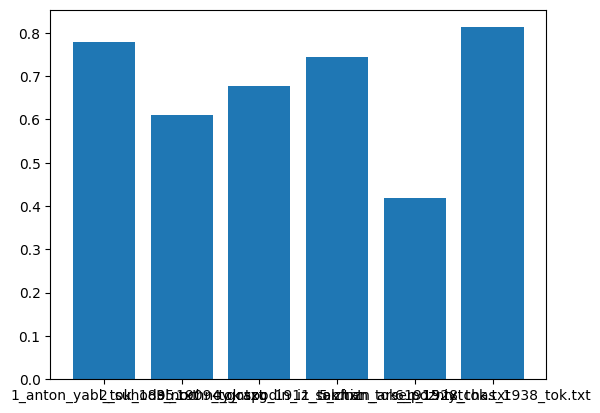

In [13]:
def word_variety (text):
    unique = len(set(text))/len(text)
    return unique

texts_v = []
for key in d.keys():
    texts_v.append(word_variety(d[key]))

x_axiss = ['1_anton_yabl_tok_1895.txt', '2_suhodol_1909_tok.txt', '3_nochnoy_razg_1911_tok.txt',\
           '4_gospodin_iz_sanfran_tok_1915.txt', '5_zhizn_arsen_1928_tok.txt', '6_pozniy_chas_1938_tok.txt']

plt.bar(x_axiss, texts_v)

Вывод 1: лексическое разнообразие почти не менялось за время жизни Бунина. <br>
Но в произведении "Поздний час" оно резко возросло. Скорее всего это связано с тем, что это одно из последих прозаических произведений автора.

**Преобладающие части речи в произведениях**

In [ ]:
%pip install pymorphy2
import pymorphy3
from collections import Counter
morph = pymorphy3.MorphAnalyzer()
import numpy as np

In [16]:
def spp (text) : #spp - speech parts
    adj = []
    for word in text:
        word = morph.parse(word)[0].normal_form
        adj.append(morph.parse(word)[0].tag.POS)
    adj2 = Counter(adj)
    return adj2.most_common(4)

texts_spp = []
for key in d.keys():
    texts_spp.append(spp(d[key]))

In [18]:
# ячейку трогать можно лишь единожды

right = ["NOUN","ADJF","INFN", "ADVB", "CONJ"]
a = texts_spp[1][1]
texts_spp[1][1] = texts_spp[1][2]
texts_spp[1][2] = a

b = texts_spp[2][1]
texts_spp[2][1] = texts_spp[2][2]
texts_spp[2][2] = b

In [19]:
texts_spp

[[('NOUN', 1308), ('ADJF', 647), ('INFN', 634), ('ADVB', 216)],
 [('NOUN', 4512), ('ADJF', 2043), ('INFN', 2655), ('ADVB', 759)],
 [('NOUN', 1530), ('ADJF', 606), ('INFN', 1306), ('ADVB', 240)],
 [('NOUN', 1858), ('ADJF', 1039), ('INFN', 916), ('ADVB', 345)],
 [('NOUN', 20288), ('ADJF', 13453), ('INFN', 11432), ('ADVB', 4603)],
 [('NOUN', 448), ('ADJF', 315), ('INFN', 231), ('ADVB', 104)]]

In [35]:
x = ["СУЩ","ПРИЛ", "ГЛАГ", "НАР"]

def helper(k,n): 
    y = []
    true_y = []
    for l in texts_spp[k]:
        y.append(l[n])               
    for el in y:
        true_el = el/sum(y)
        true_y.append(true_el)
    return true_y

y1 = helper(0,1)
y2 = helper(1,1)
y3 = helper(2,1)
y4 = helper(3,1)
y5 = helper(4,1)
y6 = helper(5,1)

<function matplotlib.pyplot.show(close=None, block=None)>

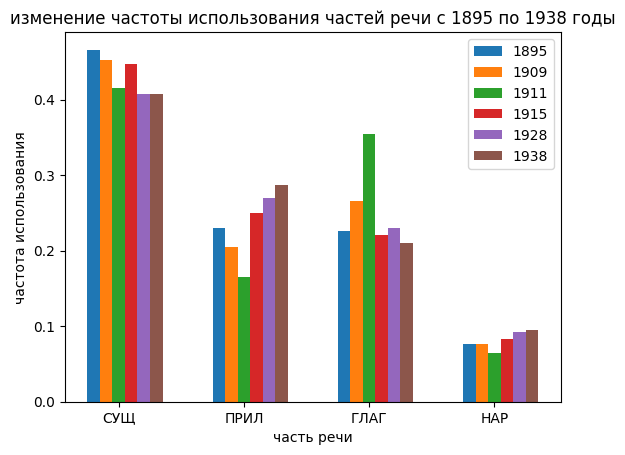

In [36]:
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2,y1,0.1,label="1895")
plt.bar(x_axis - 0.1,y2,0.1,label="1909")
plt.bar(x_axis - 0,y3,0.1,label="1911")
plt.bar(x_axis + 0.1,y4,0.1,label="1915")
plt.bar(x_axis + 0.2,y5,0.1,label="1928")
plt.bar(x_axis + 0.3,y6,0.1,label="1938")

plt.xticks(x_axis, x) 
plt.xlabel("часть речи") 
plt.ylabel("частота использования") 
plt.title("изменение частоты использования частей речи с 1895 по 1938 годы") 
plt.legend() 

plt.show

Вывод 2: У Бунина наблюдается обилие прилагательных в произведениях поздних лет. <br>
Есть гипотеза, что существует тренд к увеличению описательной составляющей. <br>
Наречия тоже служат показателем большего количества описаний <br>
<br>
Вывод 3: Причём посередине двух периодов наблюдается скачок, (на произведении "ночной разговор"). <br>
В произведении и правда много диалогов -> глаголы "сказал", "отозвался", "спросил"

**Самые частые слова**

In [46]:
def common_words(text):
    text2 = Counter(text).most_common(5)
    return text2

texts_cw = []
for key in d.keys():
    texts_cw.append(common_words(d[key]))

for row in texts_cw:
    for el in row:
        print(el[0], end = " ")
    print("\n")

сад точно помню весь поле 

наталья петр наташка петрович барышня 

сказал федот гимназист пашка старик 

сан франциско господин капри среди 

своей очень день жизни весь 

пошел свете видел город улицы 



Вывод 4: сравнив самые частые слова с содержанием книги, мы можем сделать вывод, что они способны указывать на: <br>
<br>
Локацию (в "Антоновских яблоках" автор вспоминает сад, остров Капри из произведения "Господин из Сан-Франциско", город и улицы в пр. "Поздний час") <br>
<br>
Имена и роли главных героев (суходол, ночной разговор) <br>
